# Logistic Regression
## Definition 
A statistical strategy for predicting binary classes is logistic regression. The result or goal variable is a binary variable. The term dichotomous refers to the fact that there are only two potential classifications. Using a logit function, logistic regression predicts the likelihood of a binary event occurring.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMFvoMHABccfNgE2-0IQzuVhYci05TloJU4w&usqp=CAU)

## Algorithm
* Similar to linear regression, the logistic regression model computes a weighted sum of the input variables, but it then runs the result through a non-linear function called the logistic function or sigmoid function to get the output y. The output is binary, or in the form of 0/1 or -1/1 in this case.

\begin{aligned}
z &= w_0 + w_1x_1 +  w_2x_2 + ...+w_n x_n\\
\hat y &= \sigma(z) = \frac{1}{1+e^{-z}}
\end{aligned}

<img src="https://miro.medium.com/max/1838/0*bR5RIB1lKfj_vW2W.png" width="600" height="400" />

As the graph shows, the sigmoid functions is an S-shaped curve that grows closer to 1 as the input variable's value rises above 0 and becomes closer to 0 as the input variable's value decreases below 0. When the input variable is 0, the output of the sigmoid function is 0.5.


* The dependent variable in logistic regression follows Bernoulli Distribution.

$$p(y|x)=\hat y^y(1-\hat y)^{1-y}\Rightarrow 
\begin{cases}
y=1  &\rightarrow p(y|x)=\hat y \\
y=0 &\rightarrow p(y|x)=1-\hat y
\end{cases}
$$

* To get the best weights, we usually maximize the log-likelihood function (LLF) for all observations i = 1,..., n.

$$LLF = log p(y|x)= y log\hat y+ (1 − y) log(1 − \hat y).$$

Maximizing the above function is equivalent to minimize $-log p(y|x)= -y log\hat y- (1 − y) log(1 − \hat y).$

## Steps
* Randomly select x, y from the training data.

* Feed-Forward into the neural network
<img src="https://media5.datahacker.rs/2021/01/44.jpg" width="600" height="400" />

* Updates weights and bias with learning rate $\alpha$

    * $w_1\Rightarrow w_1-\alpha(y-\hat y)x_1$
    * $w_2\Rightarrow w_2-\alpha(y-\hat y)x_2$
    * $b\Rightarrow b-\alpha(y-\hat y)$
    
* Repeat the above three steps until desired loss in-sample is reached or a maximimum number of steps is reached.

## Data: Pima Indians Diabetes Database
The National Institute of Diabetes and Digestive and Kidney Diseases provided this data. The goal of this dataset is to diagnose whether a patient has diabetes using diagnostic metrics provided in the collection. All of the patients at this clinic are Pima Indian women who are at least 21 years old. There are various medical predictor factors in the dataset, as well as one  binary target variable, **Outcome**. And the predictor variables are:
* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age

## Package 
I will use the following packages in this project:
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [numpy](https://numpy.org)
* [pandas](https://pandas.pydata.org)
* [sklearn](https://scikit-learn.org/stable/)

## Part One: Fitting a Logistic Regression model with in class code 
Firstly, I will Fit a Logistic Regression model with in class code to the Pima Indians Diabetes Data with two input vectors, **Glucose** and **BMI**.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [63]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
X = diabetes[["Glucose", "BMI"]].to_numpy()
Y = diabetes["Outcome"].to_numpy()

### Min-Max Scaling
The simplest approach, also known as min-max scaling or min-max normalization, consists of rescaling the range of features to scale the range in [0, 1] or [1, 1]. The goal range is determined by the data's type. The following is the general formula for a min-max of [0, 1]:
$$x'={\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$$

In [65]:
# X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
# X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))
X

array([[0.74371859, 0.50074516],
       [0.42713568, 0.39642325],
       [0.91959799, 0.34724292],
       ...,
       [0.6080402 , 0.390462  ],
       [0.63316583, 0.4485842 ],
       [0.46733668, 0.45305514]])

### Data Visualization


Text(0, 0.5, 'BMI')

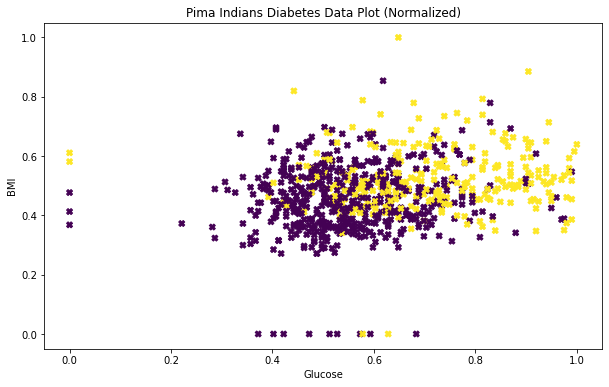

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = "X")
plt.title("Pima Indians Diabetes Data Plot (Normalized)")
plt.xlabel("Glucose")
plt.ylabel("BMI")

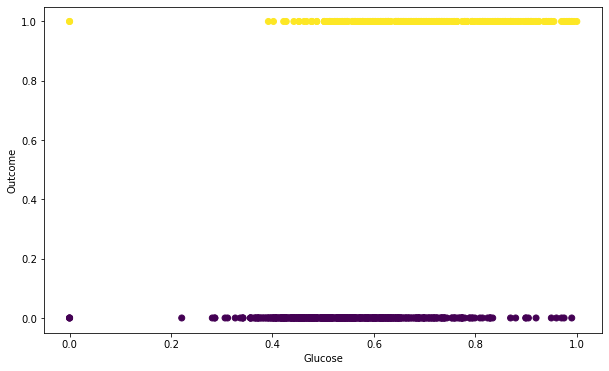

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.show()

### Sigmoid Function

Text(0, 0.5, 'sigma(z)')

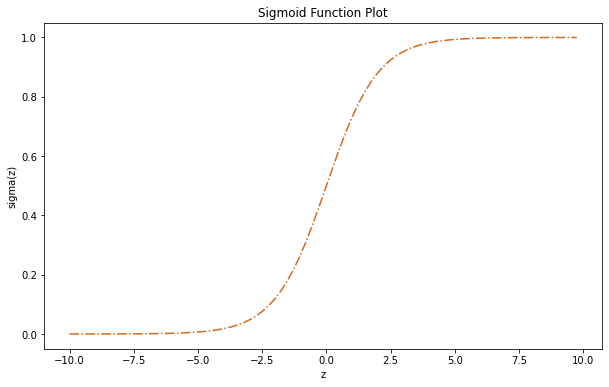

In [68]:
# define sigmoid, activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain),linestyle='-.', color = "chocolate")
plt.title("Sigmoid Function Plot")
plt.xlabel("z")
plt.ylabel("sigma(z)")

In [69]:
# Define the cross entropy loss function
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)
cross_entropy_loss(1.0, .5)

0.6931471805599453

In [70]:
# Updates weights and bias 
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 

# Function of y_hat
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)       

In [71]:
w = np.random.randn(2)# Set initial weights and bias 
b = np.random.randn()# Set initial bias 
alpha = 0.25 # Learning rate
feed_forward(X[0], w, b)

0.18388331934365923

In [72]:
# Implement Stochastic Gradient Descent Implement Stochastic Gradient Descent. 
# Iterate 10,000 times and record the loss.
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 564.4645661149965
Total Loss at time 1001 = 416.28193825938433
Total Loss at time 2001 = 396.47526513958496
Total Loss at time 3001 = 390.2550265527343
Total Loss at time 4001 = 387.8175577823557
Total Loss at time 5001 = 386.73887038482263
Total Loss at time 6001 = 386.22652745977126
Total Loss at time 7001 = 385.97254692484233
Total Loss at time 8001 = 385.84323054924283
Total Loss at time 9001 = 385.7762438501605


In [73]:
# Define the prediction function. 
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

In [74]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
    # print(f"Prediction: {y_hat}")
    # print(f"True label: {y}")
    # print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 66.40625%


The accuracy of our prediction is 66.4%, which is lower than the in class example 85%. Let's try another scaling method.

### Unit-Length Scaling
Another option that is widely used in machine-learning is to scale the components of a feature vector such that the complete vector has length one. This usually means dividing each component by the Euclidean length of the vector:
$$ x' = \frac{x}{\Vert x \Vert}$$

In [75]:
diabetes = pd.read_csv("diabetes.csv")
X = diabetes[["Glucose", "BMI"]].to_numpy()
Y = diabetes["Outcome"].to_numpy()

In [76]:
X[:, 0] = X[:, 0]/np.linalg.norm(X[:, 0])
X[:, 1] = X[:, 1]/np.linalg.norm(X[:, 1])

# X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
# X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))
X

array([[0.04270834, 0.03679789],
       [0.02452844, 0.02913166],
       [0.05280828, 0.02551759],
       ...,
       [0.03491695, 0.02869359],
       [0.0363598 , 0.03296478],
       [0.02683699, 0.03329333]])

In [77]:
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 1823.5214203026783
Total Loss at time 1001 = 480.49557006185245
Total Loss at time 2001 = 479.5978198525749
Total Loss at time 3001 = 478.70991405691484
Total Loss at time 4001 = 477.8317394458004
Total Loss at time 5001 = 476.9631838263163
Total Loss at time 6001 = 476.10413604654633
Total Loss at time 7001 = 475.2544859997305
Total Loss at time 8001 = 474.4141246277479
Total Loss at time 9001 = 473.58294392394424


In [78]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
    # print(f"Prediction: {y_hat}")
    # print(f"True label: {y}")
    # print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 57.421875%


With Unit-Length Scaling method, the accuracy of our prediction becomes smaller. The loss of the 10,000 iterations is also larger than min-max scaling method.

## Part Two: Fitting a Logistic Regression model using Scikit-Learn Function 

Then, I will fit a Logistic Regression model with Scikit-learn function to the Pima Indians Diabetes Data with two input vectors, **Glucose** and **BMI**.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in sklearn.model_selection to split the dataset into the training set and test set.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Using [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to create a model and train it.

In [79]:
# Create a Model and Train It
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [80]:
# obtain the predicted outputs 
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [81]:
# obtain the accuracy
model.score(X_test, y_test)

0.734375

### Confusion Matrix
A confusion matrix can provide extra information about the model's accuracy. When it comes to binary categorization, the confusion matrix displays the following numbers:
* True negatives in the upper-left position
* False negatives in the lower-left position
* False positives in the upper-right position
* True positives in the lower-right position


In [82]:
#  create the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

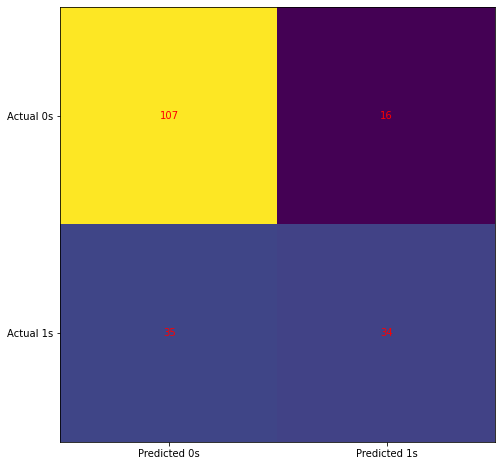

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [84]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       123
           1       0.68      0.49      0.57        69

    accuracy                           0.73       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192



## Reference 
Python, R. (n.d.). Logistic Regression In Python – Real Python. Logistic Regression in Python – Real Python. https://realpython.com/logistic-regression-python/#logistic-regression-overview.